# Heart Disease Prediction and EDA

### **Table of Contents**
* [<span style="color:#A690A4"> 0. Executive Summary](#exe_sum)
* [<span style="color:#A690A4"> 1. Introduction](#intro)
* [<span style="color:#A690A4"> 2. Collect, Wrangle & Explore Data](#process)
* [<span style="color:#A690A4"> 3. Predict Asking Price](#predict)
* [<span style="color:#A690A4"> 4. Conclusion](#conclusion)

# <span style="color:#5E6997">Executive Summary</span> <a class="anchor" id="exe_sum"></a>

# <span style="color:#5E6997">Introduction</span> <a class="anchor" id="intro"></a>

Determining which features to analyze involves focusing on their **relevance to the target variable** (`HadHeartAttack`) while considering their statistical, medical, or logical relationship. Here's how you can prioritize features for analysis and preprocessing:

---

#### 1. **Direct Medical Relevance**
   Features directly related to heart attack risk based on medical knowledge are high-priority. These include:
   - **HadAngina**: Angina is a symptom of coronary heart disease, strongly associated with heart attacks.
   - **HadStroke**: Stroke shares many risk factors with heart attacks.
   - **HadCOPD**: Chronic obstructive pulmonary disease is associated with cardiovascular issues.
   - **HadDiabetes**: Diabetes is a known risk factor for heart disease.
   - **BMI, PhysicalActivities, SmokerStatus, AlcoholDrinkers**: Lifestyle factors strongly correlated with cardiovascular health.
   - **AgeCategory, Sex**: Demographics highly predictive of heart disease.

#### 2. **Comorbid Conditions**
   Features that capture comorbidities or associated health issues:
   - **HadDepressiveDisorder**: Depression is linked to heart disease through stress and inflammation.
   - **HadKidneyDisease**: Kidney disease can contribute to heart conditions.
   - **GeneralHealth**: Self-reported health status often reflects multiple underlying conditions.

#### 3. **Behavioral and Preventive Health**
   Features that reflect health-seeking behaviors or preventive measures:
   - **LastCheckupTime**: Regular checkups may reduce heart attack risk through early intervention.
   - **FluVaxLast12, PneumoVaxEver, TetanusLast10Tdap**: Proxy for health awareness or regular healthcare access.
   - **ChestScan**: May indicate a history of lung or cardiovascular screening.

#### 4. **Disabilities and Functional Limitations**
   These features capture physical challenges that may be proxies for poor cardiovascular health:
   - **DifficultyWalking**: A strong indicator of reduced mobility, often associated with heart conditions.
   - **DifficultyConcentrating, DifficultyErrands**: Proxy for severe health or neurological issues.

#### 5. **Statistical Considerations**
   Features with significant variation or imbalance may require adjustments:
   - **State**: May add little predictive power unless there’s geographic disparity in heart attack prevalence.
   - **CovidPos**: Analyze if post-COVID complications affect heart attack risk.

#### 6. **Feature Engineering Opportunities**
   Create derived features or group similar ones:
   - Combine **HeightInMeters** and **WeightInKilograms** into **BMI** (already included).
   - Create an **Exercise Regularity** feature from `PhysicalActivities` and `SleepHours`.
   - Combine comorbidity indicators (`HadDiabetes`, `HadCOPD`, etc.) into a **Comorbidity Index**.

#### 7. **Correlation with Target Variable**
   Use a **correlation matrix** or statistical tests (e.g., chi-square for categorical variables, ANOVA for numeric variables) to identify features with the strongest relationships to `HadHeartAttack`.

#### 8. **Class Imbalance**
   Check if `HadHeartAttack` is imbalanced (e.g., many more "No" than "Yes"). If so, focus on features with strong predictive power to address the imbalance during modeling.



# <span style="color:#5E6997">Collect, Wrangle, and Explore Data</span> <a class="anchor" id="process"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings("ignore", message=".*use_inf_as_na option is deprecated.*")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/personal-key-indicators-of-heart-disease/2020/heart_2020_cleaned.csv
/kaggle/input/personal-key-indicators-of-heart-disease/2022/heart_2022_with_nans.csv
/kaggle/input/personal-key-indicators-of-heart-disease/2022/heart_2022_no_nans.csv


In [2]:
import pandas as pd

# Load the dataset
file_path = '/kaggle/input/personal-key-indicators-of-heart-disease/2022/heart_2022_no_nans.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(df.head())

     State     Sex GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
0  Alabama  Female     Very good                 4.0               0.0   
1  Alabama    Male     Very good                 0.0               0.0   
2  Alabama    Male     Very good                 0.0               0.0   
3  Alabama  Female          Fair                 5.0               0.0   
4  Alabama  Female          Good                 3.0              15.0   

                                     LastCheckupTime PhysicalActivities  \
0  Within past year (anytime less than 12 months ...                Yes   
1  Within past year (anytime less than 12 months ...                Yes   
2  Within past year (anytime less than 12 months ...                 No   
3  Within past year (anytime less than 12 months ...                Yes   
4  Within past year (anytime less than 12 months ...                Yes   

   SleepHours            RemovedTeeth HadHeartAttack  ... HeightInMeters  \
0         9.0            Non

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246022 entries, 0 to 246021
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      246022 non-null  object 
 1   Sex                        246022 non-null  object 
 2   GeneralHealth              246022 non-null  object 
 3   PhysicalHealthDays         246022 non-null  float64
 4   MentalHealthDays           246022 non-null  float64
 5   LastCheckupTime            246022 non-null  object 
 6   PhysicalActivities         246022 non-null  object 
 7   SleepHours                 246022 non-null  float64
 8   RemovedTeeth               246022 non-null  object 
 9   HadHeartAttack             246022 non-null  object 
 10  HadAngina                  246022 non-null  object 
 11  HadStroke                  246022 non-null  object 
 12  HadAsthma                  246022 non-null  object 
 13  HadSkinCancer              24

### Display Unique Values for Each Column

In [4]:
# Iterate through each column and process based on data type
for column in df.columns:
    if df[column].dtype == 'object':  # Categorical variables
        unique_values = df[column].unique()
        print(f"Column: {column}")
        print(f"Unique Values: {unique_values}\n")
    else:  # Numeric variables
        col_min = df[column].min()
        col_max = df[column].max()
        print(f"Column: {column}")
        print(f"Range: {col_min} to {col_max}\n")

Column: State
Unique Values: ['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia'
 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming' 'Guam' 'Puerto Rico'
 'Virgin Islands']

Column: Sex
Unique Values: ['Female' 'Male']

Column: GeneralHealth
Unique Values: ['Very good' 'Fair' 'Good' 'Excellent' 'Poor']

Column: PhysicalHealthDays
Range: 0.0 to 30.0

Column: MentalHealthDays
Range: 0.0 to 30.0

Column: LastCheckupTime
Unique Values: ['Within past year (anytime less than 12 months ago)'
 '5 or mor

### Description of Each Feature

Here’s a brief rundown of what each column in the dataset represents:

`State` - State FIPS Code\
`Sex` - Sex of Respondent\
`GeneralHealth` - Would you say that in general your health is:\
`PhysicalHealthDays` - Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good?\
`MentalHealthDays` - Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good?\
`LastCheckupTime` - About how long has it been since you last visited a doctor for a routine checkup?\
`PhysicalActivities` - During the past month, other than your regular job, did you participate in any physical activities or exercises such as running, calisthenics, golf, gardening, or walking for exercise?\
`SleepHours` - On average, how many hours of sleep do you get in a 24-hour period?\
`RemovedTeeth` - Not including teeth lost for injury or orthodontics, how many of your permanent teeth have been removed because of tooth decay or gum disease?\
`HadHeartAttack` - (Ever told) you had a heart attack, also called a myocardial infarction?\
`HadAngina` - (Ever told) (you had) angina or coronary heart disease?\
`HadStroke` - (Ever told) (you had) a stroke.\
`HadAsthma` - (Ever told) (you had) asthma?\
`HadSkinCancer` - (Ever told) (you had) skin cancer that is not melanoma?\
`HadCOPD` - (Ever told) (you had) C.O.P.D. (chronic obstructive pulmonary disease), emphysema or chronic bronchitis?\
`HadDepressiveDisorder` - (Ever told) (you had) a depressive disorder (including depression, major depression, dysthymia, or minor depression)?\
`HadKidneyDisease` - Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?\
`HadArthritis` - (Ever told) (you had) some form of arthritis, rheumatoid arthritis, gout, lupus, or fibromyalgia?  (Arthritis diagnoses include: rheumatism, polymyalgia rheumatica; osteoarthritis (not osteporosis); tendonitis, bursitis, bunion, tennis elbow; carpal tunnel syndrome, tarsal tunnel syndrome; joint infection, etc.)\
`HadDiabetes` - (Ever told) (you had) diabetes?\
`DeafOrHardOfHearing` - Are you deaf or do you have serious difficulty hearing?\
`BlindOrVisionDifficulty` - Are you blind or do you have serious difficulty seeing, even when wearing glasses?\
`DifficultyConcentrating` - Because of a physical, mental, or emotional condition, do you have serious difficulty concentrating, remembering, or making decisions?\
`DifficultyWalking` - Do you have serious difficulty walking or climbing stairs?\
`DifficultyDressingBathing` - Do you have difficulty dressing or bathing?\
`DifficultyErrands` - Because of a physical, mental, or emotional condition, do you have difficulty doing errands alone such as visiting a doctor´s office or shopping?\
`SmokerStatus` - Four-level smoker status:  Everyday smoker, Someday smoker, Former smoker, Non-smoker\
`ECigaretteUsage` - Would you say you have never used e-cigarettes or other electronic vaping products in your entire life or now use them every day, use them some days, or used them in the past but do not currently use them at all?\
`ChestScan` - Have you ever had a CT or CAT scan of your chest area?\
`RaceEthnicityCategory` - Five-level race/ethnicity category\
`AgeCategory` - Fourteen-level age category\
`HeightInMeters` - Reported height in meters\
`WeightInKilograms` - Reported weight in kilograms\
`BMI` - Body Mass Index (BMI)\
`AlchoholDrinkers` - Adults who reported having had at least one drink of alcohol in the past 30 days.\
`HIVTesting` - Adults who have ever been tested for HIV\
`FluVaxLast12` - During the past 12 months, have you had either flu vaccine that was sprayed in your nose or flu shot injected into your arm?\
`PneumoVaxEver` - Have you ever had a pneumonia shot also known as a pneumococcal vaccine?\
`TetanusLast10Tdap` - Have you received a tetanus shot in the past 10 years? Was this Tdap, the tetanus shot that also has pertussis or whooping cough vaccine?\
`HighRiskLastYear` - You have injected any drug other than those prescribed for you in the past year. You have been treated for a sexually transmitted disease or STD in the past year. You have given or received money or drugs in exchange for sex in the past year.\
`CovidPos` - Has a doctor, nurse, or other health professional ever told you that you tested positive for COVID 19?


### Remove Outliers

In [5]:
# TODO: 

### Define Categorical Columns

In [6]:
# Select categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

### Plot the Distribution of Unique Values for each Categorical Variable¶

Note that some graphs have been oriented horizontally to make room for their Category names.

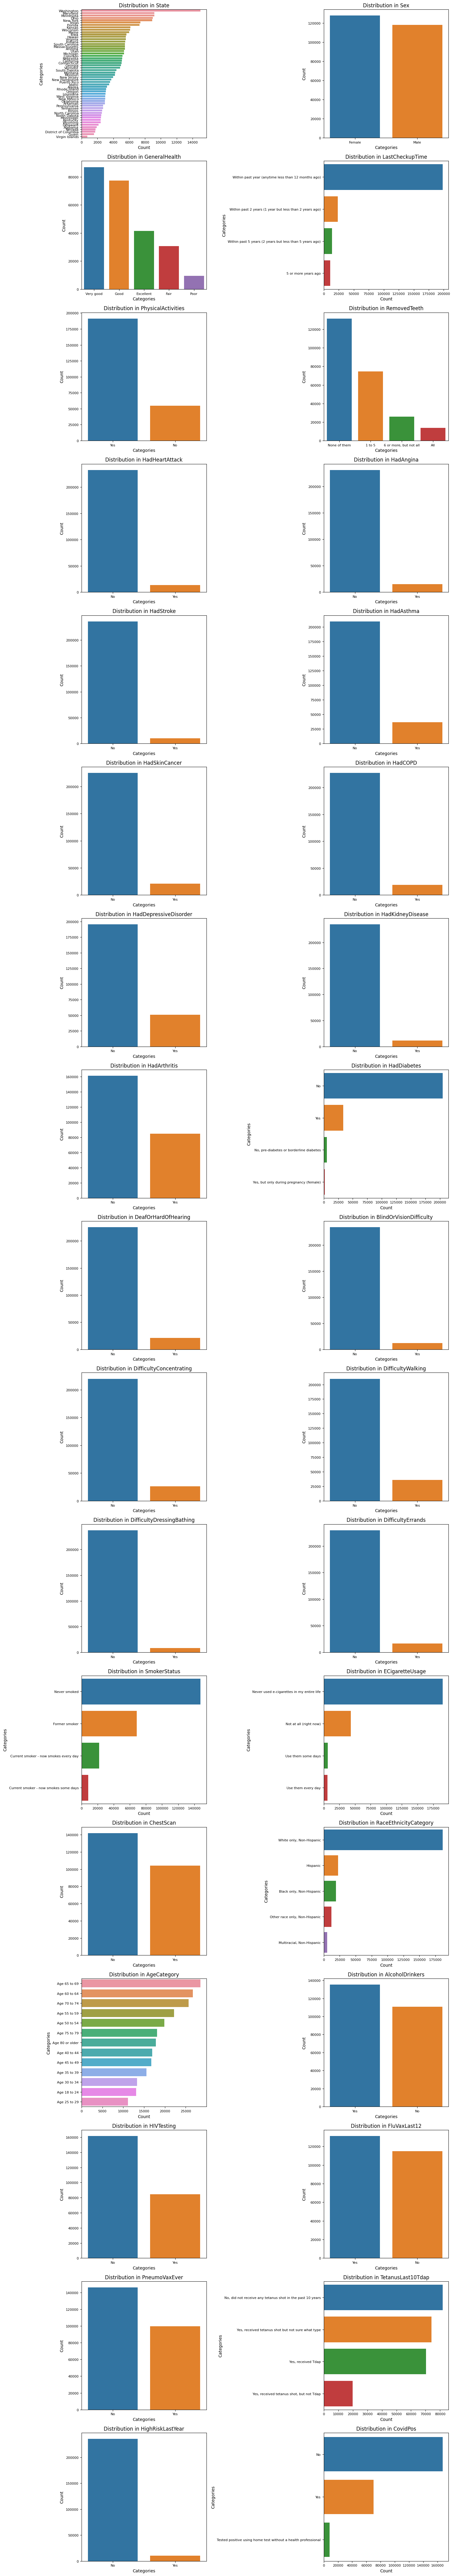

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# List of columns to orient horizontally
horizontal_columns = [
    'State', 'LastCheckupTime', 'HadDiabetes', 
    'SmokerStatus', 'ECigaretteUsage',  
    'RaceEthnicityCategory', 'AgeCategory', 'TetanusLast10Tdap', 'CovidPos'
]

# Number of columns per row for the grid
plots_per_row = 2

# Calculate the number of rows needed
num_categories = len(categorical_columns)
num_rows = math.ceil(num_categories / plots_per_row)

# Create a grid of subplots
fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(15, num_rows * 5))

# Flatten axes array if more than one row, or wrap in a list if only one row
if num_rows == 1:
    axes = [axes]
else:
    axes = axes.flatten()

# Plot the distribution of unique values for each categorical variable
for idx, column in enumerate(categorical_columns):
    value_counts = df[column].value_counts()
    
    # Check if the column should be horizontal
    if column in horizontal_columns:
        sns.barplot(y=value_counts.index, x=value_counts.values, ax=axes[idx])  # Horizontal bar plot
        axes[idx].set_ylabel('Categories', fontsize=10)
        axes[idx].set_xlabel('Count', fontsize=10)
    else:
        sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[idx])  # Vertical bar plot
        axes[idx].set_xlabel('Categories', fontsize=10)
        axes[idx].set_ylabel('Count', fontsize=10)
    
    # Set title and tick sizes
    axes[idx].set_title(f'Distribution in {column}', fontsize=12)
    axes[idx].tick_params(axis='y', labelsize=8)
    axes[idx].tick_params(axis='x', labelsize=8)

# Hide unused subplots if any
for idx in range(len(categorical_columns), len(axes)):
    fig.delaxes(axes[idx])

# Adjust layout
plt.tight_layout()
plt.show()


### Numerical Feature Distribution

In [8]:
# Select numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()

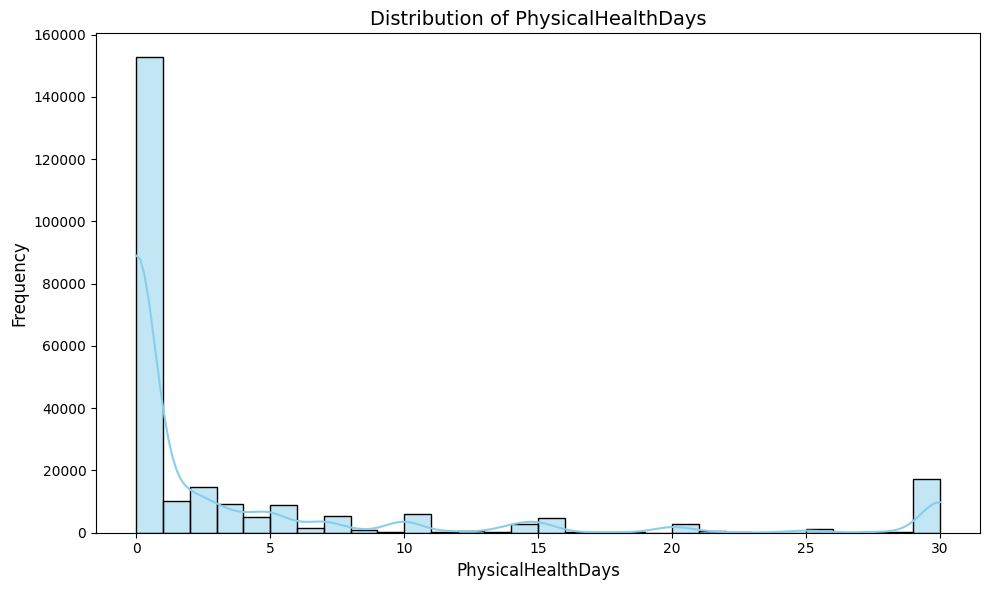

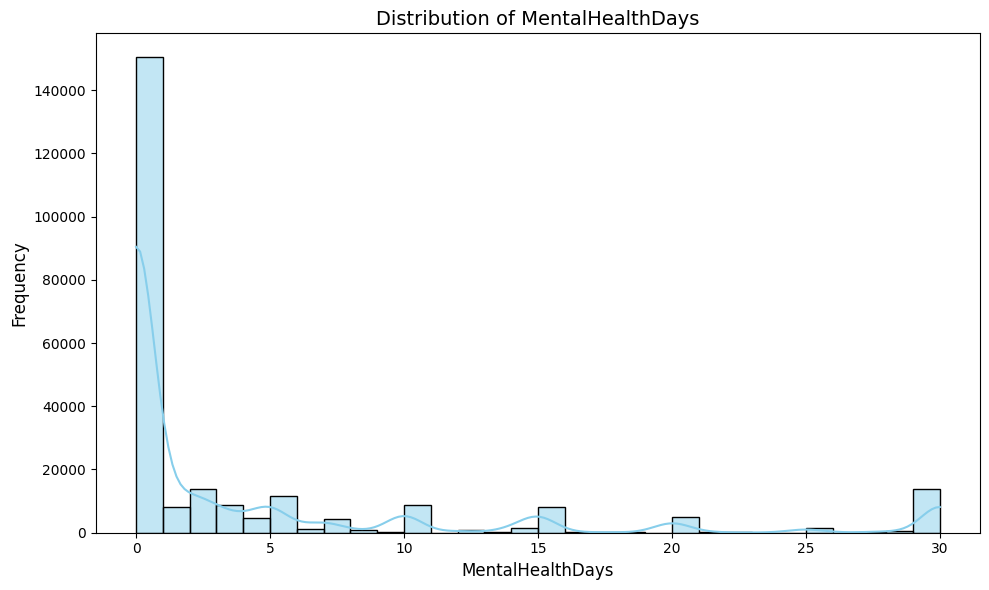

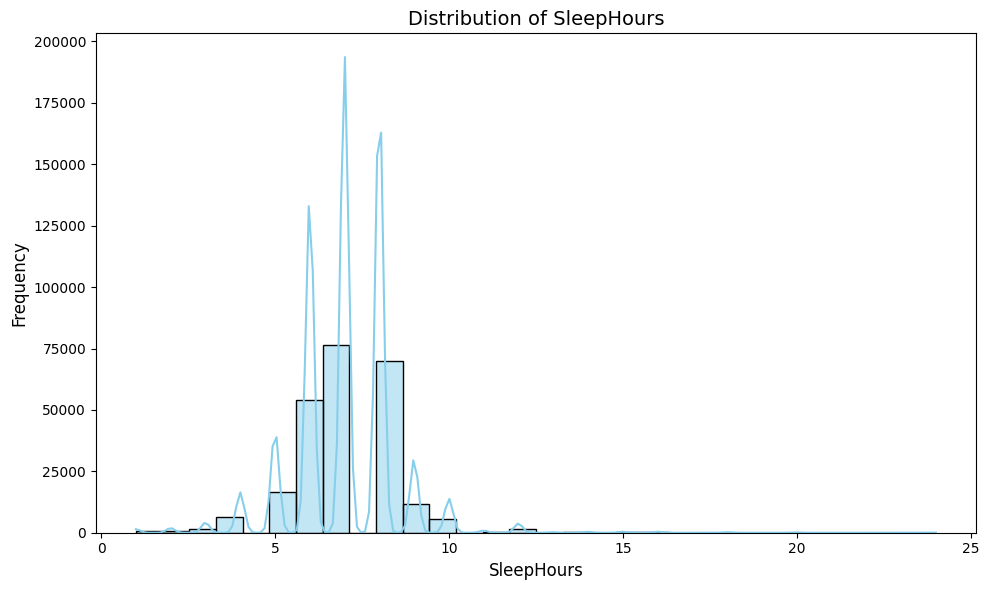

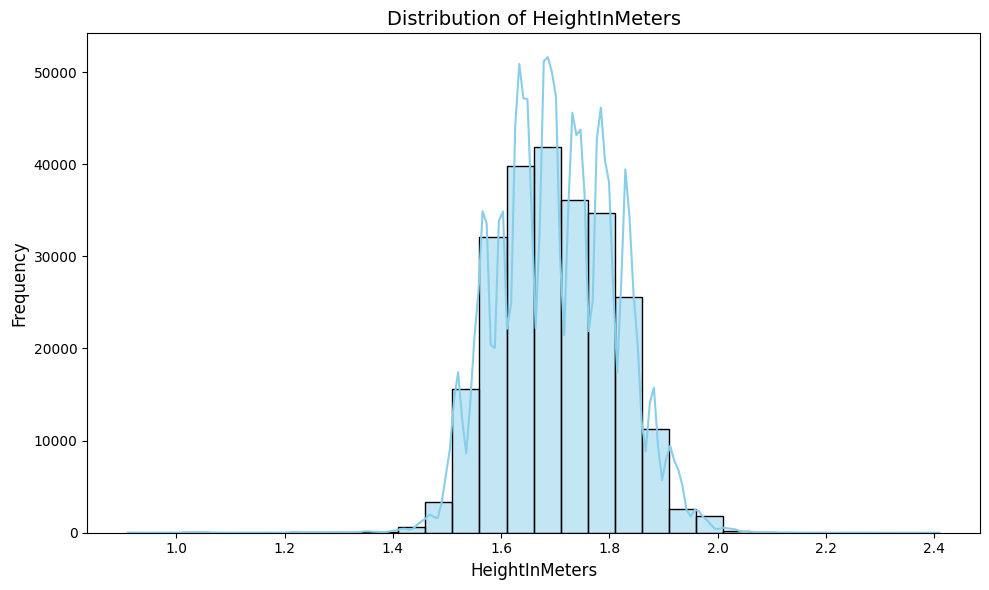

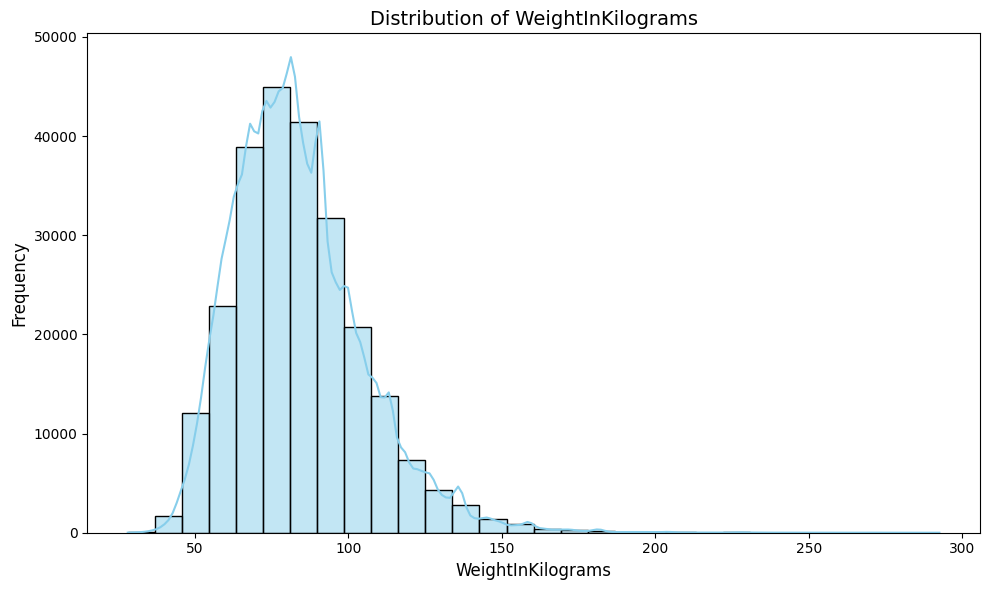

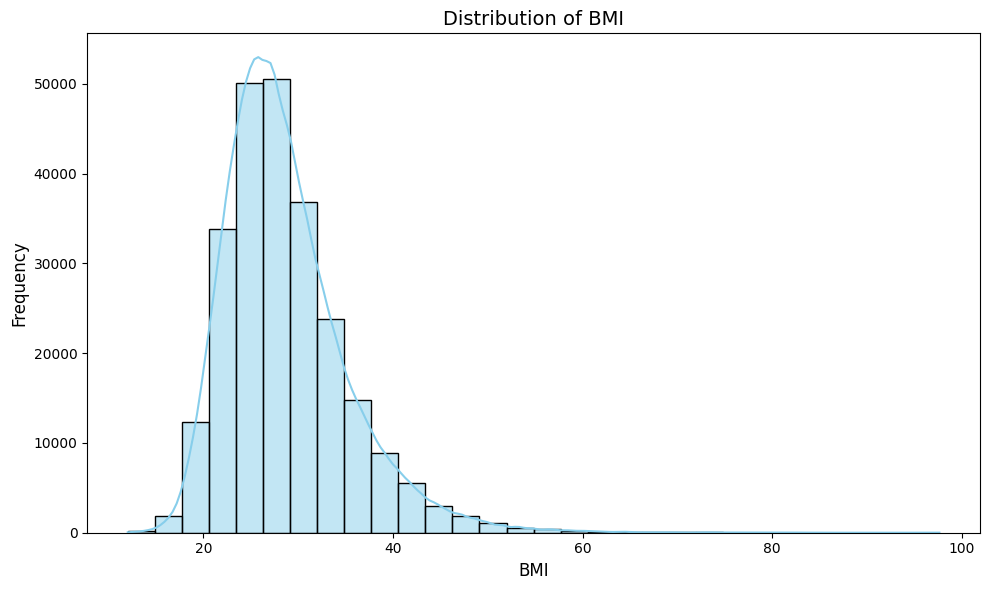

In [9]:
# Plot the distribution of each numerical variable
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.tight_layout()
    plt.show()

### Key Features Graphed

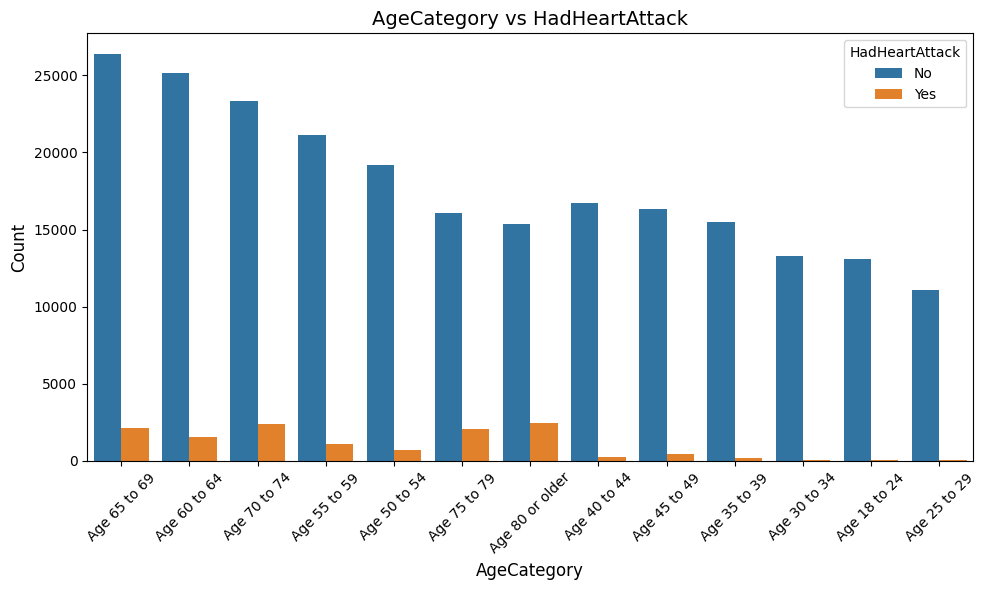

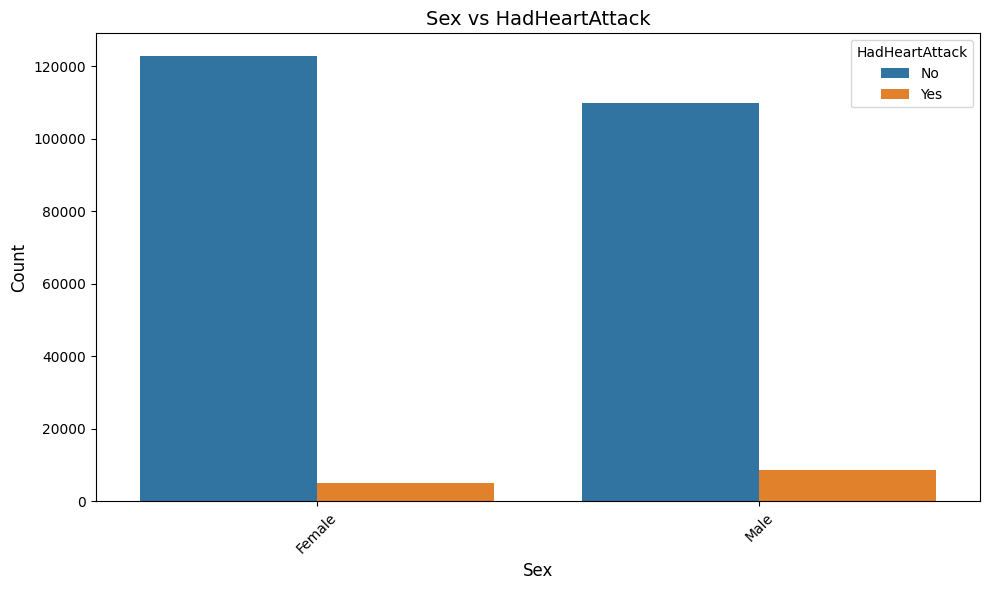

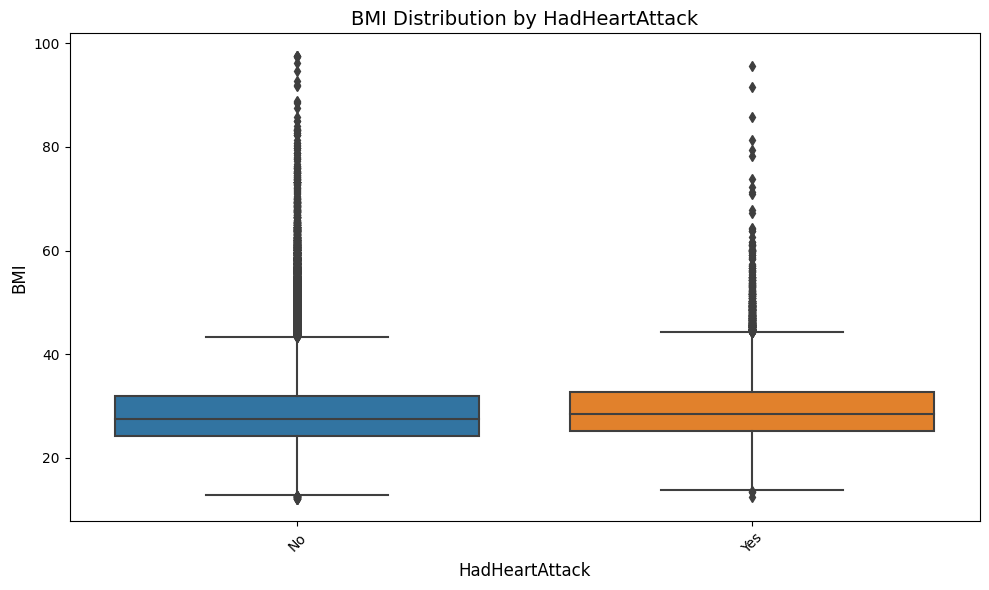

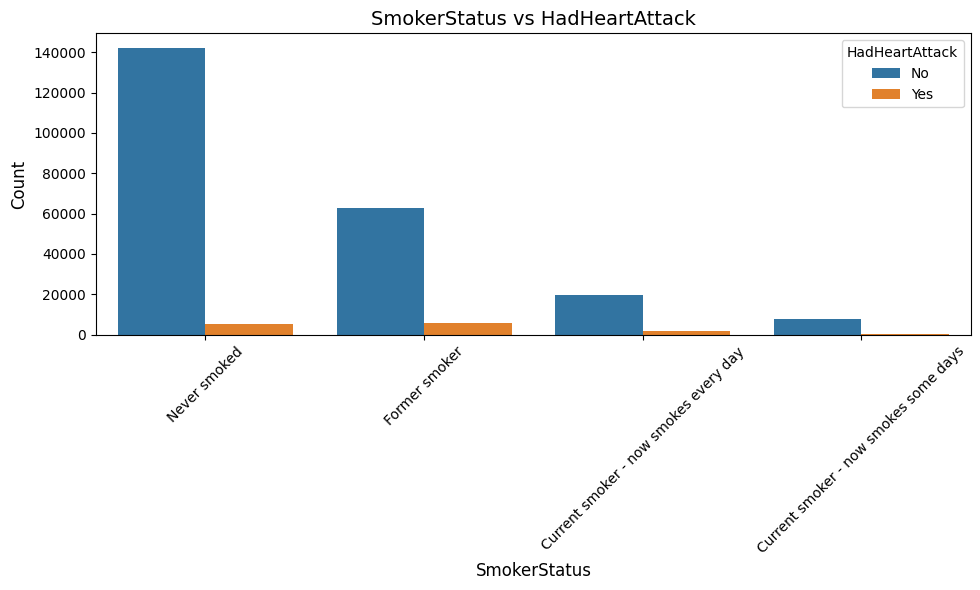

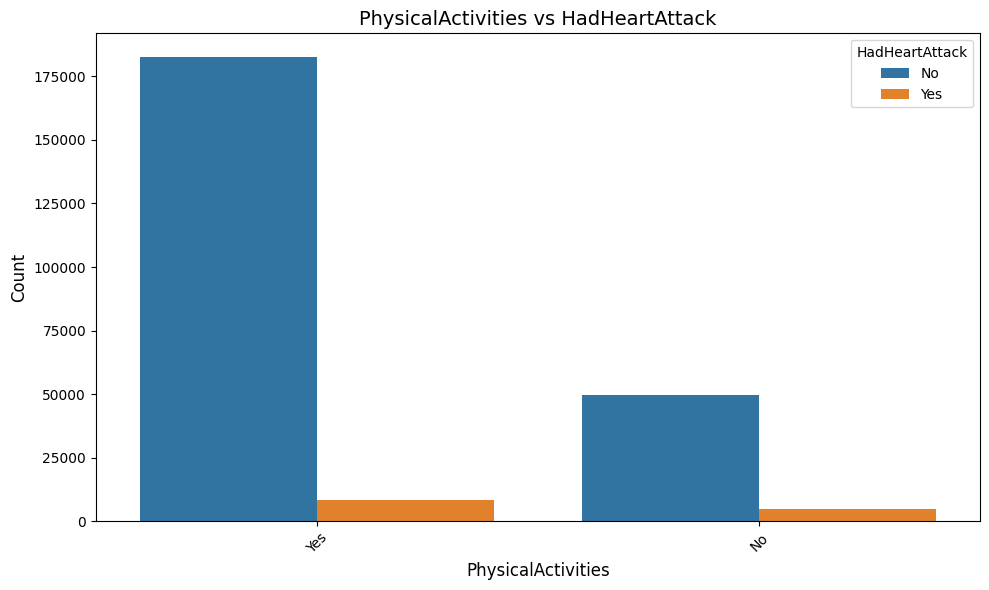

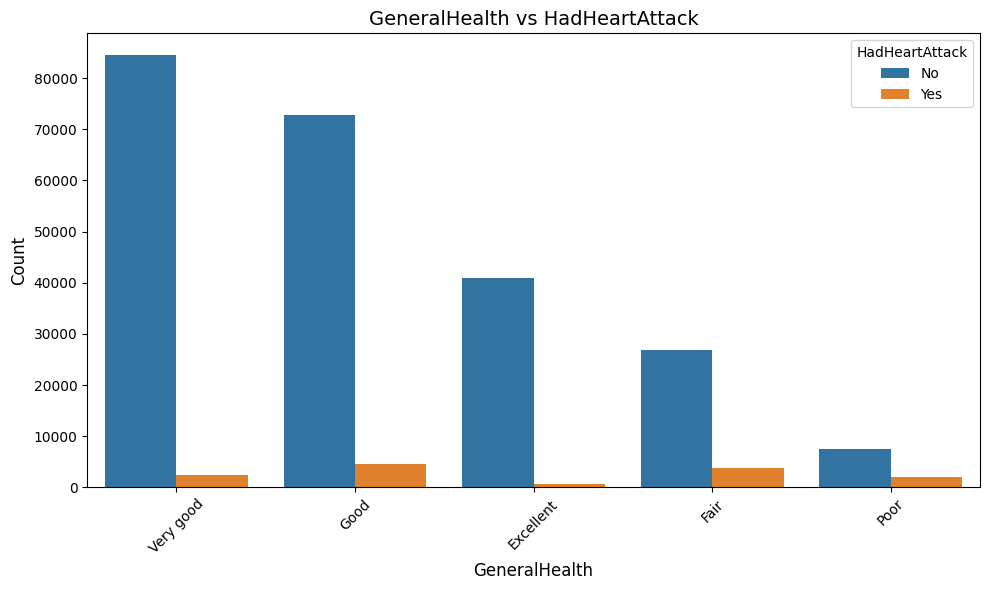

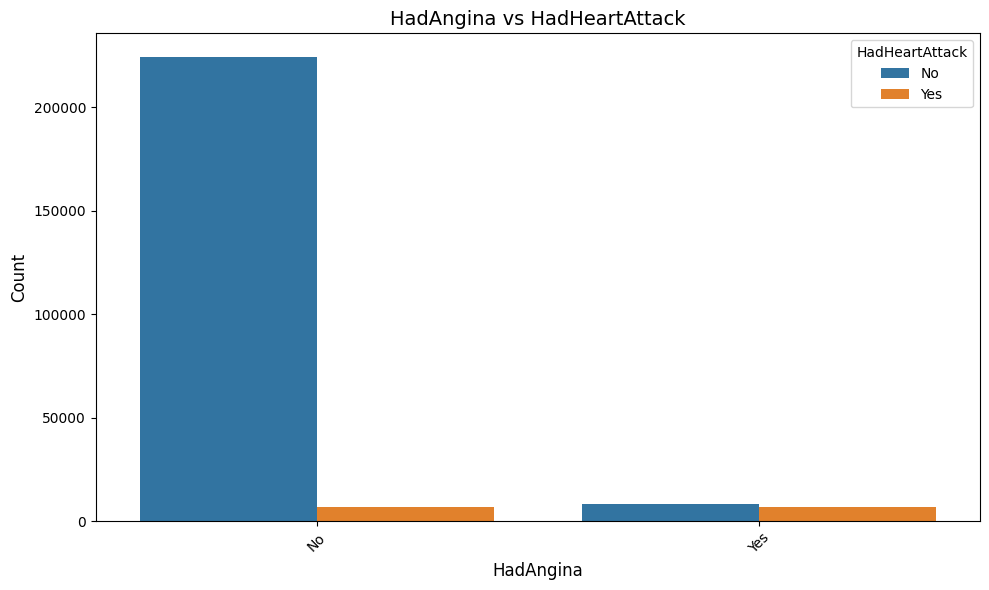

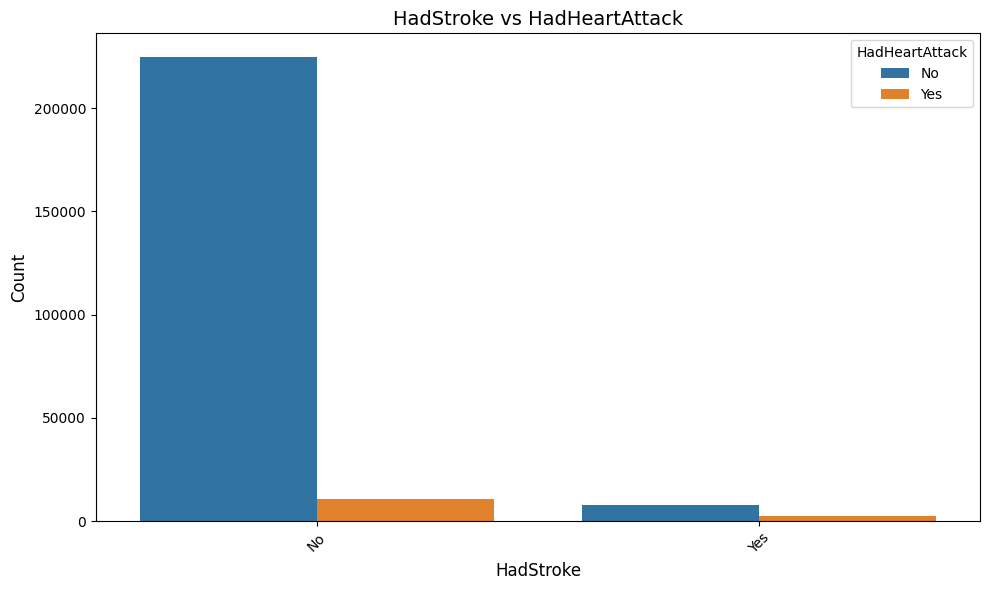

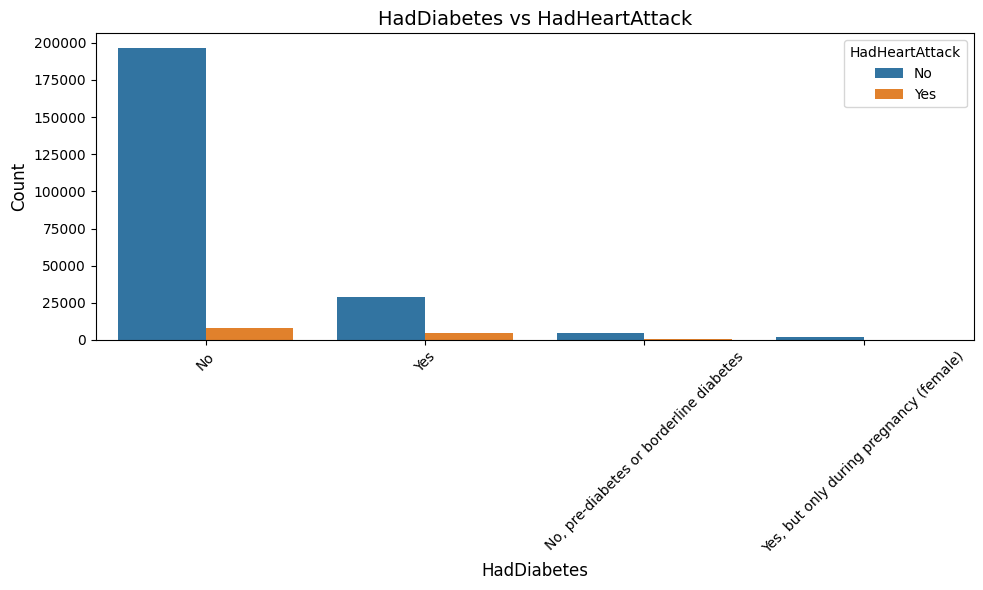

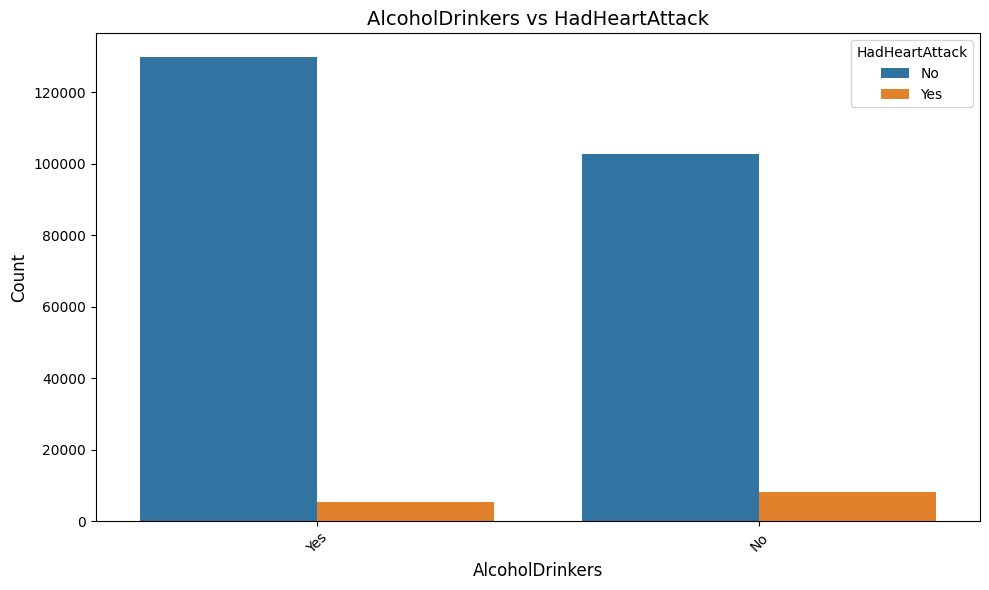

In [10]:
# Ensure 'HadHeartAttack' is present in the dataset
target = 'HadHeartAttack'

# Define a subset of key features for visualization (based on prior analysis)
key_features = [
    'AgeCategory', 'Sex', 'BMI', 'SmokerStatus', 'PhysicalActivities',
    'GeneralHealth', 'HadAngina', 'HadStroke', 'HadDiabetes', 'AlcoholDrinkers'
]

# Visualize feature-target relationships
for feature in key_features:
    plt.figure(figsize=(10, 6))
    
    if df[feature].dtype == 'object':  # Categorical features
        sns.countplot(data=df, x=feature, hue=target, order=df[feature].value_counts().index)
        plt.title(f'{feature} vs {target}', fontsize=14)
        plt.xlabel(feature, fontsize=12)
        plt.ylabel('Count', fontsize=12)
    else:  # Numeric features
        sns.boxplot(data=df, x=target, y=feature)
        plt.title(f'{feature} Distribution by {target}', fontsize=14)
        plt.xlabel(target, fontsize=12)
        plt.ylabel(feature, fontsize=12)
    
    plt.xticks(rotation=45, fontsize=10)
    plt.tight_layout()
    plt.show()


### Train/Test Split

In [11]:
X = df.drop(columns=['HadHeartAttack'])  
y = df['HadHeartAttack'] 

In [12]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0, stratify=y
)

### Feature Engineering

#### Misc Engineering
New Features Explained:
1. `ComorbidityIndex`:
    - Counts the number of chronic conditions a person has (e.g., Angina, Stroke, etc.).
2. `AgeMidpoint`:
    - Converts the AgeCategory into a numeric midpoint for easier analysis.
3. `ExerciseRegularity`:
    - Combines physical activity participation with sleep hours to estimate overall exercise regularity.
4. `HealthAwarenessIndex`:
    - Counts the number of preventive measures taken (e.g., vaccines, HIV testing).
5. `ObesityClass`:
    - Categorizes BMI into standard obesity classes (Underweight, Normal weight, etc.).

In [13]:
# Feature engineering function
def feature_engineering(data):
    # 1. Comorbidity Index
    chronic_conditions = [
        'HadAngina', 'HadStroke', 'HadCOPD', 'HadDepressiveDisorder', 
        'HadKidneyDisease', 'HadArthritis', 'HadDiabetes'
    ]
    data['ComorbidityIndex'] = data[chronic_conditions].apply(lambda x: x.eq('Yes').sum(), axis=1)

    # 2. Age Group Numeric    
    # Updated age_map with correct categories
    age_map = {
        'Age 18 to 24': 21, 'Age 25 to 29': 27, 'Age 30 to 34': 32,
        'Age 35 to 39': 37, 'Age 40 to 44': 42, 'Age 45 to 49': 47,
        'Age 50 to 54': 52, 'Age 55 to 59': 57, 'Age 60 to 64': 62,
        'Age 65 to 69': 67, 'Age 70 to 74': 72, 'Age 75 to 79': 77,
        'Age 80 or older': 85
    }
    
    # Map AgeCategory to numeric AgeMidpoint and handle missing mappings
    data['AgeMidpoint'] = data['AgeCategory'].map(age_map)
    
    # Check for any remaining NaN values in AgeMidpoint
    missing_age_midpoint = data[data['AgeMidpoint'].isna()]
    if not missing_age_midpoint.empty:
        print("Rows with NaN in AgeMidpoint:")
        print(missing_age_midpoint[['AgeCategory', 'AgeMidpoint']])
    
    # 3. Exercise Regularity
    data['ExerciseRegularity'] = data['PhysicalActivities'].apply(lambda x: 1 if x == 'Yes' else 0) * data['SleepHours']

    # 4. Health Awareness Index
    preventive_measures = ['FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap', 'HIVTesting']
    data['HealthAwarenessIndex'] = data[preventive_measures].apply(lambda x: x.eq('Yes').sum(), axis=1)

    # 5. Obesity Class
    def classify_bmi(bmi):
        if bmi < 18.5:
            return 'Underweight'
        elif 18.5 <= bmi < 24.9:
            return 'Normal weight'
        elif 25 <= bmi < 29.9:
            return 'Overweight'
        else:
            return 'Obesity'
    data['ObesityClass'] = data['BMI'].apply(classify_bmi)
    
    return data

# Apply feature engineering to train and test sets
X_train = feature_engineering(X_train)
X_test = feature_engineering(X_test)

#### One-Hot Encoding

In [14]:
from sklearn.preprocessing import OneHotEncoder

# Dynamically get categorical columns from X_train
categorical_columns_in_train = X_train.select_dtypes(include=['object']).columns.tolist()

# Features to one-hot encode (excluding 'State')
one_hot_features = [col for col in categorical_columns_in_train if col != 'State']

# Extract unique categories for each feature
all_categories = [X_train[col].dropna().unique().tolist() for col in one_hot_features]

# Initialize the OneHotEncoder with all possible categories
encoder = OneHotEncoder(categories=all_categories, sparse_output=False, drop='first')

# Fit and transform the training data
X_train_encoded = encoder.fit_transform(X_train[one_hot_features])

# Transform the test data
X_test_encoded = encoder.transform(X_test[one_hot_features])

# Convert encoded arrays back to DataFrames
encoded_feature_names = encoder.get_feature_names_out(one_hot_features)
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoded_feature_names, index=X_train.index)
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoded_feature_names, index=X_test.index)

# Drop original categorical columns and add the encoded columns
X_train = X_train.drop(columns=one_hot_features).join(X_train_encoded_df)
X_test = X_test.drop(columns=one_hot_features).join(X_test_encoded_df)

#### Encode the Target

In [15]:
# Convert 'No' to 0 and 'Yes' to 1 in y_train and y_test
y_train = y_train.map({'No': 0, 'Yes': 1})
y_test = y_test.map({'No': 0, 'Yes': 1})

#### Encoding of the `State` Feature

In [16]:
from category_encoders import TargetEncoder

# Initialize the TargetEncoder
encoder = TargetEncoder(cols=['State'])

# Fit and transform the training data
X_train['State'] = encoder.fit_transform(X_train[['State']], y_train)

# Transform the test data
X_test['State'] = encoder.transform(X_test[['State']])


#### Feature Selection / Mutual Information


In [17]:
from sklearn.feature_selection import mutual_info_classif

# Calculate mutual information
mi_scores = mutual_info_classif(X_train, y_train)

# Create a DataFrame for results
mi_results = pd.DataFrame({
    'Feature': X_train.columns,
    'MI_Score': mi_scores
}).sort_values(by='MI_Score', ascending=False)

# Select top features (e.g., top 10)
top_features = mi_results.head(10)['Feature'].tolist()

In [18]:
# Filter X_train and X_test to include only top features
X_train = X_train[top_features]
X_test = X_test[top_features]

# Verify the shape of the updated datasets
print("Updated X_train shape:", X_train.shape)
print("Updated X_test shape:", X_test.shape)

Updated X_train shape: (196817, 10)
Updated X_test shape: (49205, 10)


**Recommendations**:
1. **Prioritize High-MI Features**:
    * Focus on the top ~10 features (e.g., HadAngina_Yes, SmokerStatus, ComorbidityIndex) for initial modeling.
2. **Combine or Drop Low-MI Features**:
    * Combine weakly informative features (e.g., AgeCategory) into broader categories.
    * Drop features with near-zero MI scores (e.g., RaceEthnicityCategory_Other race).
3. **Further Analysis**:
    * Conduct interaction analysis for features like BMI and ObesityClass, as their joint effect may be significant despite low individual MI scores.

#### SMOTE?

In [19]:
# TODO:

#### Scaling Data

In [20]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Identify numerical columns, including integers and floats
numerical_columns = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Exclude binary columns (columns with only 0 and 1 as unique values)
binary_columns = [col for col in numerical_columns if set(X_train[col].unique()) <= {0, 1}]
non_binary_columns = [col for col in numerical_columns if col not in binary_columns]

# Scale non-binary numerical features in training data
X_train[non_binary_columns] = scaler.fit_transform(X_train[non_binary_columns])

# Scale non-binary numerical features in testing data
X_test[non_binary_columns] = scaler.transform(X_test[non_binary_columns])

In [21]:
X_train.head()

,HadAngina_Yes,SmokerStatus_Never smoked,ECigaretteUsage_Never used e-cigarettes in my entire life,ComorbidityIndex,Sex_Female,ChestScan_Yes,FluVaxLast12_Yes,AlcoholDrinkers_No,PneumoVaxEver_Yes,AgeMidpoint
75129,0.0,0.0,0.0,-0.848930,0.0,0.0,0.0,0.0,0.0,-1.615804
245692,0.0,1.0,1.0,-0.848930,1.0,0.0,0.0,0.0,0.0,-1.615804
192955,0.0,1.0,1.0,0.079881,1.0,0.0,0.0,1.0,0.0,0.352862
109572,0.0,1.0,1.0,-0.848930,0.0,0.0,0.0,0.0,0.0,-0.772090
219652,0.0,0.0,0.0,1.937504,1.0,0.0,1.0,1.0,0.0,0.352862


# <span style="color:#5E6997">Predict Heart Attacks</span> <a class="anchor" id="predict"></a>

## Define a Function to Evaluate Models

In [22]:
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def evaluate_model_performance(model, X_test, y_test):
    """
    Evaluates model performance, plots the ROC curve and confusion matrix, 
    and saves them with dynamic file names based on the model's class name.

    Parameters:
    - model: Trained model object (supports `predict_proba` or `decision_function`).
    - X_test: Test feature set.
    - y_test: Test target set.
    """
    # Make a dynamic model name
    model_name = model.__class__.__name__.lower()

    # Handle predict_proba or decision_function
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, "decision_function"):
        y_proba = model.decision_function(X_test)
    else:
        raise AttributeError(f"The model {model.__class__.__name__} does not support `predict_proba` or `decision_function`.")
    
    # Compute ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)

    # Plot the ROC curve
    print(f'Model Name: {model_name}')
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.3f})")
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line for random guessing
    plt.xlabel("False Positive Rate (FPR)")
    plt.ylabel("True Positive Rate (TPR)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend(loc="lower right")

    # Save the ROC curve with dynamic name
    roc_filename = f"roc_curve_{model_name}.png"
    plt.savefig(roc_filename, dpi=300, bbox_inches='tight')

    plt.show()

    # Print AUC
    print(f"AUC: {auc:.3f}")

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model with confusion matrix and classification report
    conf_matrix = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, zero_division=1)

    # Print report
    print("\nClassification Report:")
    print(report)

    # Plot the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['No Stroke', 'Stroke'])
    disp.plot(cmap='Blues', values_format='d')
    plt.title("Confusion Matrix Heatmap")

    # Save the confusion matrix heatmap with dynamic name
    cm_filename = f"cmatrix_{model_name}.png"
    plt.savefig(cm_filename, dpi=300, bbox_inches='tight')

    plt.show()
    print('-' * 55 + '\n\n')


## Base Models

Model Name: logisticregression


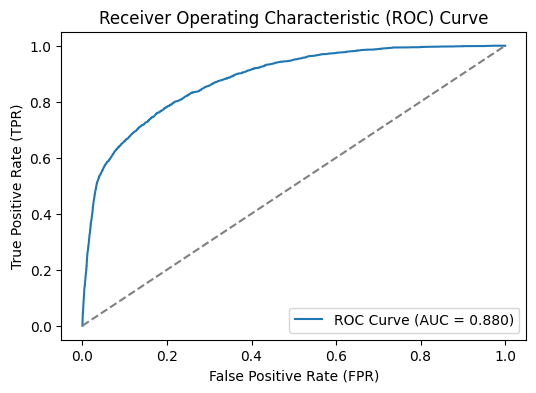

AUC: 0.880

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     46518
           1       0.56      0.25      0.34      2687

    accuracy                           0.95     49205
   macro avg       0.76      0.62      0.66     49205
weighted avg       0.94      0.95      0.94     49205



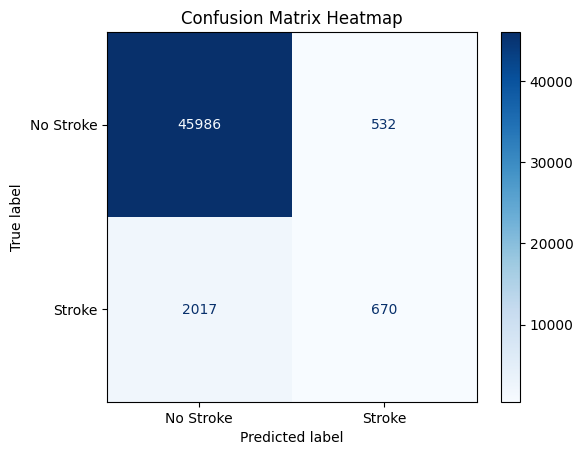

-------------------------------------------------------


Model Name: randomforestclassifier


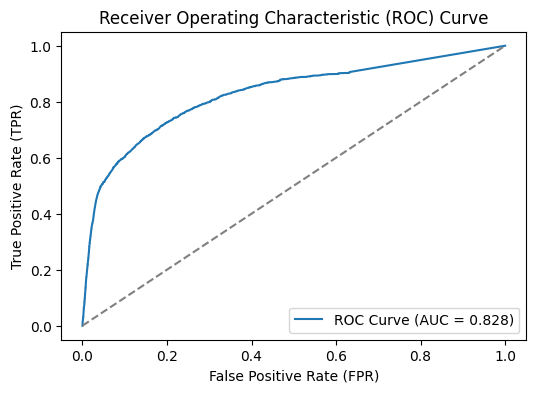

AUC: 0.828

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     46518
           1       0.51      0.21      0.30      2687

    accuracy                           0.95     49205
   macro avg       0.73      0.60      0.64     49205
weighted avg       0.93      0.95      0.93     49205



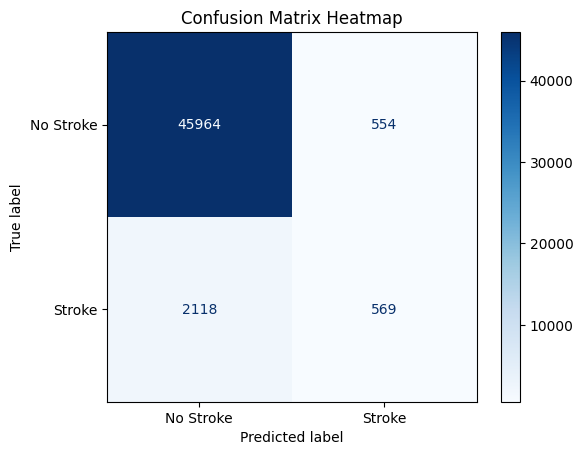

-------------------------------------------------------


Model Name: gradientboostingclassifier


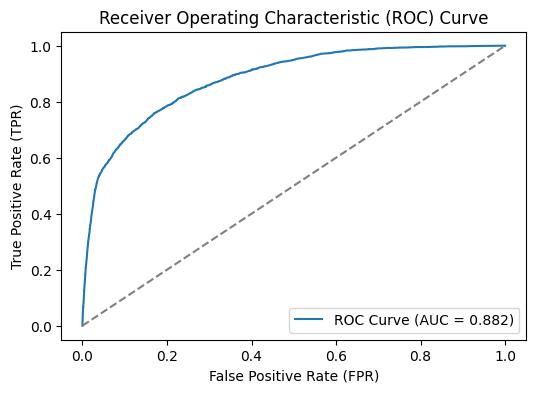

AUC: 0.882

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     46518
           1       0.60      0.21      0.31      2687

    accuracy                           0.95     49205
   macro avg       0.78      0.60      0.64     49205
weighted avg       0.94      0.95      0.94     49205



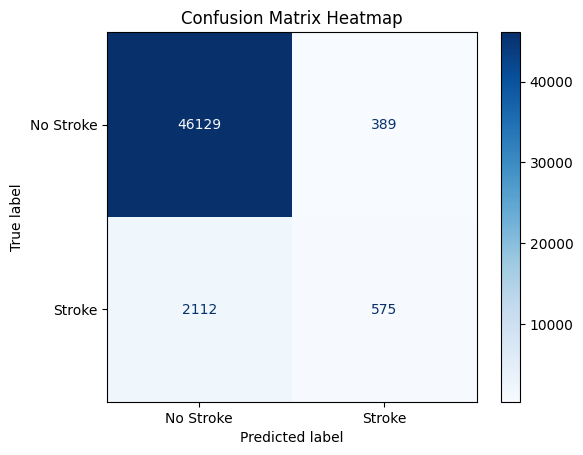

-------------------------------------------------------


Model Name: linearsvc


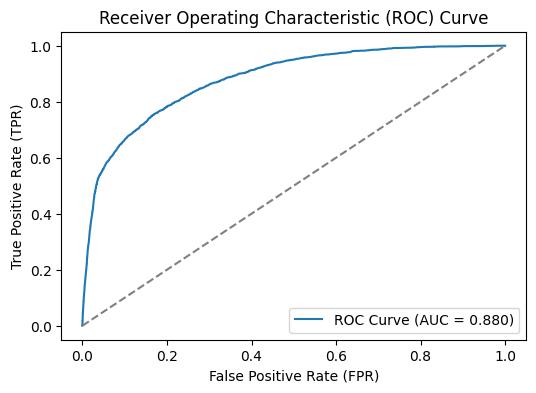

AUC: 0.880

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     46518
           1       0.65      0.09      0.16      2687

    accuracy                           0.95     49205
   macro avg       0.80      0.54      0.57     49205
weighted avg       0.93      0.95      0.93     49205



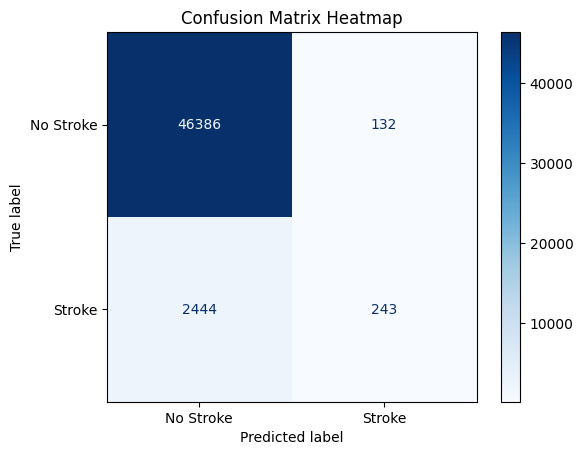

-------------------------------------------------------




In [23]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

# Initialize base models
models = [
    LogisticRegression(max_iter=1000, random_state=0),
    RandomForestClassifier(random_state=0),
    GradientBoostingClassifier(random_state=0),
    LinearSVC(max_iter=10000, random_state=0)
]

# Train and evaluate each model
for model in models:
    model.fit(X_train, y_train)
    evaluate_model_performance(model, X_test, y_test)


**Base Model Results**\
Model: Logistic Regression \
ROC AUC Score: 0.880\
Classification Report:

        precision    recall  f1-score   support

           0       0.96      0.99      0.97     46518
           1       0.56      0.25      0.34      2687

    accuracy                           0.95     49205
    macro avg      0.76      0.62      0.66     49205
    weighted avg   0.94      0.95      0.94     49205


Model: Random Forest\
Classification Report:

               precision    recall  f1-score   support

           0       0.96      0.99      0.97     46518
           1       0.51      0.21      0.30      2687

    accuracy                           0.95     49205
    macro avg      0.73      0.60      0.64     49205
    weighted avg   0.93      0.95      0.93     49205


Model: Gradient Boosting\
ROC AUC Score: 0.882\
Classification Report:

               precision    recall  f1-score   support

           0       0.96      0.99      0.97     46518
           1       0.60      0.21      0.31      2687

    accuracy                           0.95     49205
    macro avg      0.78      0.60      0.64     49205
    weighted avg   0.94      0.95      0.94     49205


Model: Linear SVM\
ROC AUC Score: 0.880\
Classification Report:

               precision    recall  f1-score   support

           0       0.95      1.00      0.97     46518
           1       0.65      0.09      0.16      2687

    accuracy                           0.95     49205
    macro avg      0.80      0.54      0.57     49205
    weighted avg   0.93      0.95      0.93     49205

## Tuned Logistic Regression Model

Best parameters for Logistic Regression: {'C': 1, 'solver': 'liblinear'}
Best ROC AUC for Logistic Regression: 0.8789728932043067

TEST DATA RESULTS
Model Name: gridsearchcv


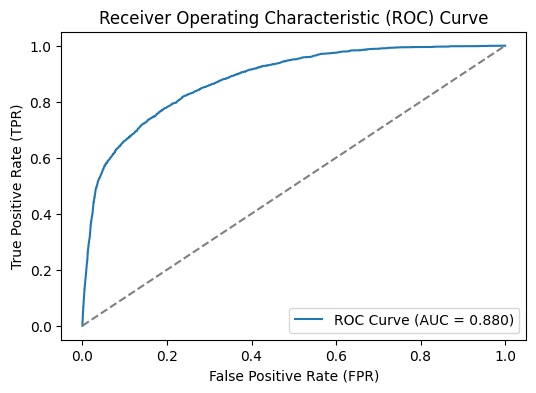

AUC: 0.880

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.82      0.90     46518
           1       0.20      0.76      0.31      2687

    accuracy                           0.82     49205
   macro avg       0.59      0.79      0.60     49205
weighted avg       0.94      0.82      0.86     49205



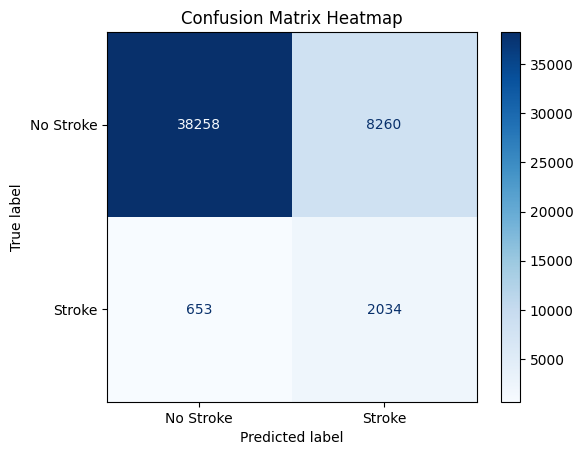

-------------------------------------------------------




In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define parameter grid for Logistic Regression
param_tuned_lr = {
    'C': [0.1, 1, 10],  # Regularization strength
    'solver': ['liblinear', 'lbfgs'],  # Optimization algorithms
}

# Initialize model
lr = LogisticRegression(max_iter=1000, random_state=0, class_weight='balanced')

# Grid search
tuned_lr = GridSearchCV(lr, param_tuned_lr, scoring='roc_auc', cv=5, n_jobs=-1)
tuned_lr.fit(X_train, y_train)

print("Best parameters for Logistic Regression:", tuned_lr.best_params_)
print("Best ROC AUC for Logistic Regression:", tuned_lr.best_score_)
# Evaluate the model
print("\nTEST DATA RESULTS")
evaluate_model_performance(tuned_lr, X_test, y_test)


## Tuned Random Forest Model

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 500}
Best ROC AUC for Random Forest: 0.8778451983742258

TEST DATA RESULTS
Model Name: gridsearchcv


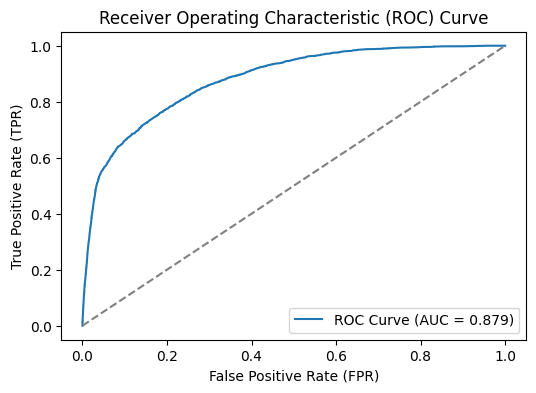

AUC: 0.879

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.82      0.89     46518
           1       0.19      0.76      0.31      2687

    accuracy                           0.81     49205
   macro avg       0.59      0.79      0.60     49205
weighted avg       0.94      0.81      0.86     49205



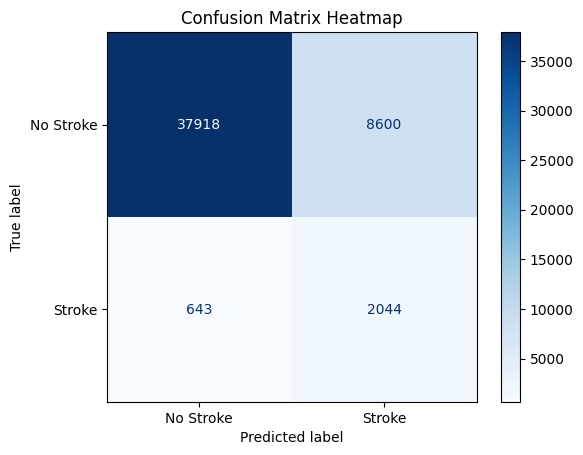

-------------------------------------------------------




In [25]:
from sklearn.ensemble import RandomForestClassifier

# Define parameter grid for Random Forest
param_tuned_rf = {
    'n_estimators': [100, 200, 500],  # Number of trees
    'max_depth': [None, 10, 20],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required per leaf node
}

# Initialize model
rf = RandomForestClassifier(random_state=0, class_weight='balanced')

# Grid search
tuned_rf = GridSearchCV(rf, param_tuned_rf, scoring='roc_auc', cv=5, n_jobs=-1)
tuned_rf.fit(X_train, y_train)

print("Best parameters for Random Forest:", tuned_rf.best_params_)
print("Best ROC AUC for Random Forest:", tuned_rf.best_score_)
# Evaluate the model
print("\nTEST DATA RESULTS")
evaluate_model_performance(tuned_rf, X_test, y_test)

## Tuned Gradient Boosting Model

Best parameters for Gradient Boosting: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100}
Best ROC AUC for Gradient Boosting: 0.8803552955547975

TEST DATA RESULTS
Model Name: gridsearchcv


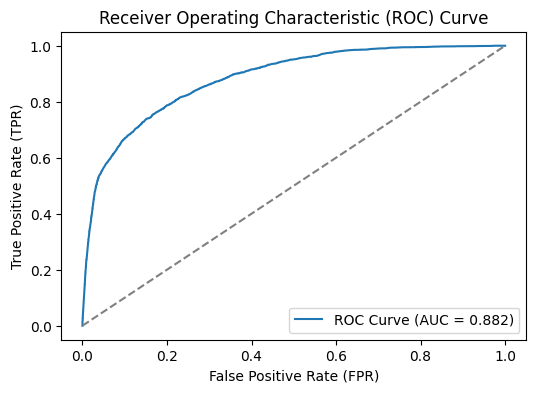

AUC: 0.882

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     46518
           1       0.59      0.20      0.30      2687

    accuracy                           0.95     49205
   macro avg       0.78      0.60      0.64     49205
weighted avg       0.94      0.95      0.94     49205



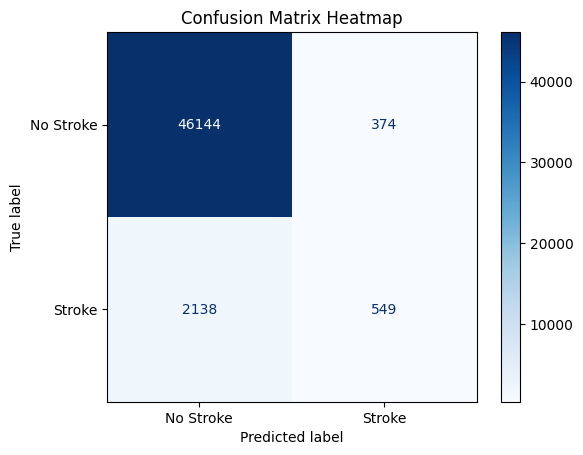

-------------------------------------------------------




In [26]:
from sklearn.ensemble import GradientBoostingClassifier

# Define parameter grid for Gradient Boosting
param_tuned_gb = {
    'learning_rate': [0.01, 0.1, 0.2],  # Step size at each iteration
    'n_estimators': [100, 200, 500],  # Number of boosting stages
    'max_depth': [3, 5, 7],  # Maximum depth of the individual estimators
}

# Initialize model
gb = GradientBoostingClassifier(random_state=0)

# Grid search
tuned_gb = GridSearchCV(gb, param_tuned_gb, scoring='roc_auc', cv=5, n_jobs=-1)
tuned_gb.fit(X_train, y_train)

print("Best parameters for Gradient Boosting:", tuned_gb.best_params_)
print("Best ROC AUC for Gradient Boosting:", tuned_gb.best_score_)
# Evaluate the model
print("\nTEST DATA RESULTS")
evaluate_model_performance(tuned_gb, X_test, y_test)

## Tuned SVM Model

Best parameters for Linear SVM: {'C': 0.1}
Best ROC AUC for Linear SVM: 0.8787023473458152

TEST DATA RESULTS
Model Name: gridsearchcv


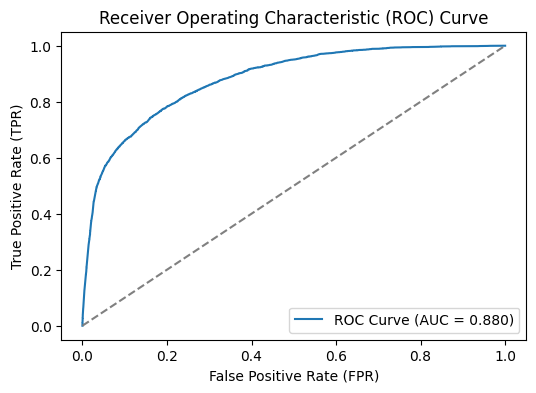

AUC: 0.880

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.83      0.90     46518
           1       0.21      0.75      0.32      2687

    accuracy                           0.83     49205
   macro avg       0.59      0.79      0.61     49205
weighted avg       0.94      0.83      0.87     49205



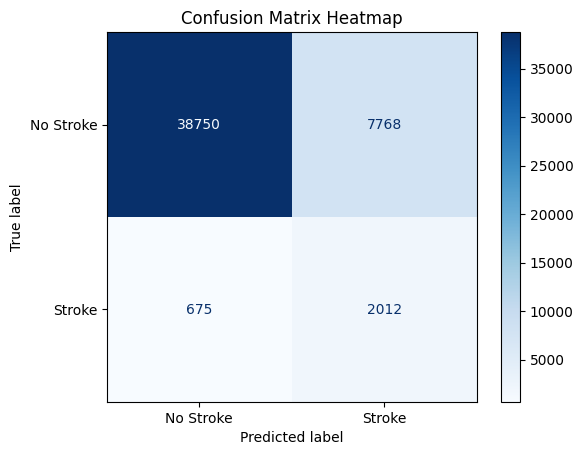

-------------------------------------------------------




In [27]:
from sklearn.svm import LinearSVC

# Define parameter grid for Linear SVM
param_tuned_svm = {
    'C': [0.01, 0.1, 1, 10],  # Regularization strength
}

# Initialize model
svm = LinearSVC(max_iter=10000, random_state=0, class_weight='balanced')

# Grid search
tuned_svm = GridSearchCV(svm, param_tuned_svm, scoring='roc_auc', cv=5, n_jobs=-1)
tuned_svm.fit(X_train, y_train)

print("Best parameters for Linear SVM:", tuned_svm.best_params_)
print("Best ROC AUC for Linear SVM:", tuned_svm.best_score_)
# Evaluate the model
print("\nTEST DATA RESULTS")
evaluate_model_performance(tuned_svm, X_test, y_test)

# <span style="color:#5E6997">Conclusion</span> <a class="anchor" id="conclusion"></a>